### Project  
##### 필수 내용 + 목표
###### 1. 지역에 따라서 선호하는 게임 장르가 다를까
###### 2. 연도별 게임의 트렌드가 있을까
###### 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
###### Goal 다음분기에 어떤 게임을 설계해야 할까  

#### EDA

                                                 Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16592                                Minna no Chizu 2      PSP  2007.0   
16593                         Ice Age 2: The Meltdown       GC  2006.0   
16594                     Rainbow Islands: Revolution      PSP  2005.0   
16595                                        NBA 2K16      PS3  2015.0   
16596                     Toukiden: The Age of Demons      PSV  2013.0   

           Genre             Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
0         Action             De

<AxesSubplot:>

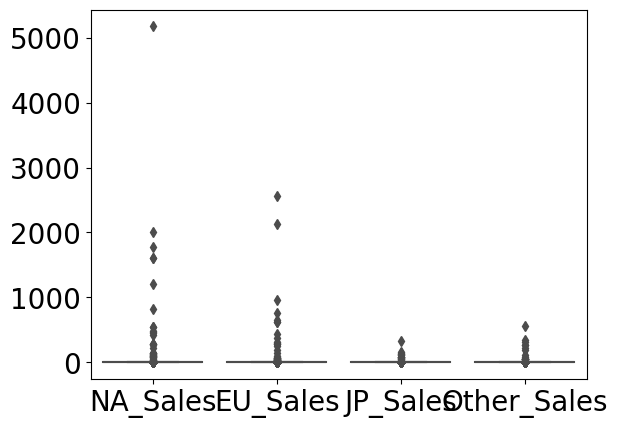

In [150]:
import numpy as np
import pandas as pd
import math
import re
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler

df = pd.read_csv('./vgames2.csv',sep=',')
df = pd.DataFrame(df)

df = df.drop('Unnamed: 0', axis=1)
df = df.drop_duplicates()
df = df[df.Year > 2004]
df = df[df.Year < 2017]
print(df)

df['NA_Sales'] = df['NA_Sales'].str.replace('K|M','', regex=True)
df['EU_Sales'] = df['EU_Sales'].str.replace('K|M','', regex=True)
df['JP_Sales'] = df['JP_Sales'].str.replace('K|M','', regex=True)
df['Other_Sales'] = df['Other_Sales'].str.replace('K|M','', regex=True)
df = df.astype({'NA_Sales':'float64', 'EU_Sales':'float64', 'JP_Sales':'float64', 'Other_Sales':'float64'})
df['All_region'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

#지역별 판매 데이터 분포확인
region_df = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
sns.boxplot(data=region_df)

# df1 = df.copy()
# df1['NA_Sales'] = df1['NA_Sales'].str.replace('(?=[^.])(?=\D).*','999999999999', regex=True)
# df1['EU_Sales'] = df1['EU_Sales'].str.replace('(?=[^.])(?=\D).*','999999999999', regex=True)
# df1['JP_Sales'] = df1['JP_Sales'].str.replace('(?=[^.])(?=\D).*','999999999999', regex=True)
# df1['Other_Sales'] = df1['Other_Sales'].str.replace('(?=[^.])(?=\D).*','999999999999', regex=True)
# df1 = df1.astype({'NA_Sales':'float64', 'EU_Sales':'float64', 'JP_Sales':'float64', 'Other_Sales':'float64'})
# df1a = df1[(df1['NA_Sales'] == 999999999999)|(df1['EU_Sales'] == 999999999999)|(df1['JP_Sales'] == 999999999999)|(df1['Other_Sales'] == 999999999999)].index
# df1a_num = len(df1a)
# print(df1a_num)

# df3 = df.copy()
# df3['NA_Sales'] = df3['NA_Sales'].str.replace('K','000', regex=True)
# df3['NA_Sales'] = df3['NA_Sales'].str.replace('M','000000', regex=True)
# df3['EU_Sales'] = df3['EU_Sales'].str.replace('K','000', regex=True)
# df3['EU_Sales'] = df3['EU_Sales'].str.replace('M','000000', regex=True)
# df3['JP_Sales'] = df3['JP_Sales'].str.replace('K','000', regex=True)
# df3['JP_Sales'] = df3['JP_Sales'].str.replace('M','000000', regex=True)
# df3['Other_Sales'] = df3['Other_Sales'].str.replace('K','000', regex=True)
# df3['Other_Sales'] = df3['Other_Sales'].str.replace('M','000000', regex=True)
# df3 = df3.astype({'NA_Sales':'float64', 'EU_Sales':'float64', 'JP_Sales':'float64', 'Other_Sales':'float64'})
# df3.iloc[df1a]

##### 1. 지역에 따라서 선호하는 게임 장르가 다를까

               NA_rate   EU_rate   JP_rate  Other_rate
Genre                                                 
Action        0.112278  0.310142  0.256114    0.262302
Adventure     0.019073  0.007360  0.035652    0.024182
Fighting      0.032488  0.006434  0.083754    0.021994
Misc          0.174363  0.150589  0.087006    0.050252
Platform      0.008528  0.093605  0.014351    0.033800
Puzzle        0.002780  0.006189  0.007402    0.002310
Racing        0.115027  0.033022  0.006969    0.097380
Role-Playing  0.061643  0.009823  0.322634    0.186273
Shooter       0.128292  0.227106  0.023791    0.110444
Simulation    0.153149  0.083910  0.012767    0.024608
Sports        0.144234  0.064096  0.080220    0.127572
Strategy      0.048145  0.007724  0.069339    0.058882


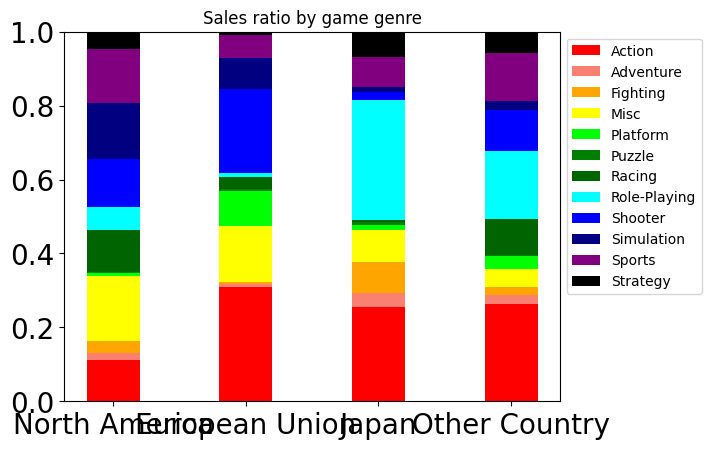

In [151]:
Genre_region_df = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Genre_region_df = Genre_region_df.dropna()
# print(Genre_region_df)

Genre_NA = Genre_region_df.groupby(Genre_region_df['Genre'])['NA_Sales'].sum()
Genre_NA = pd.DataFrame(Genre_NA)
Genre_NA.reset_index(inplace=True)
Genre_NA['NA_rate'] = Genre_NA['NA_Sales']/Genre_NA['NA_Sales'].sum()
Genre_EU = Genre_region_df.groupby(Genre_region_df['Genre'])['EU_Sales'].sum()
Genre_EU = pd.DataFrame(Genre_EU)
Genre_EU.reset_index(inplace=True)
Genre_EU['EU_rate'] = Genre_EU['EU_Sales']/Genre_EU['EU_Sales'].sum()
Genre_JP = Genre_region_df.groupby(Genre_region_df['Genre'])['JP_Sales'].sum()
Genre_JP = pd.DataFrame(Genre_JP)
Genre_JP.reset_index(inplace=True)
Genre_JP['JP_rate'] = Genre_JP['JP_Sales']/Genre_JP['JP_Sales'].sum()
Genre_Other = Genre_region_df.groupby(Genre_region_df['Genre'])['Other_Sales'].sum()
Genre_Other = pd.DataFrame(Genre_Other)
Genre_Other.reset_index(inplace=True)
Genre_Other['Other_rate'] = Genre_Other['Other_Sales']/Genre_Other['Other_Sales'].sum()
Genre_rate = Genre_NA['Genre']
Genre_rate = pd.DataFrame(Genre_rate)
Genre_rate['NA_rate'] = Genre_NA['NA_rate']
Genre_rate['EU_rate'] = Genre_EU['EU_rate']
Genre_rate['JP_rate'] = Genre_JP['JP_rate']
Genre_rate['Other_rate'] = Genre_Other['Other_rate']
Genre_rate = Genre_rate.set_index('Genre')
Genre_rate_T = Genre_rate.T
print(Genre_rate)

Genre_list = Genre_region_df['Genre'].values.tolist()
Genre_set = set(Genre_list)
Genre_list = list(Genre_set)
Genre_num = len(Genre_list)

for i in range(12):
    if i == 0:
        Action = Genre_rate.iloc[i].tolist()
    if i == 1:
        Adventure = Genre_rate.iloc[i].tolist()
    if i == 2:
        Fighting = Genre_rate.iloc[i].tolist()
    if i == 3:
        Misc = Genre_rate.iloc[i].tolist()
    if i == 4:
        Platform = Genre_rate.iloc[i].tolist()
    if i == 5:
        Puzzle = Genre_rate.iloc[i].tolist()
    if i == 6:
        Racing = Genre_rate.iloc[i].tolist()
    if i == 7:
        Role_Playing = Genre_rate.iloc[i].tolist()
    if i == 8:
        Shooter = Genre_rate.iloc[i].tolist()
    if i == 9:
        Simulation = Genre_rate.iloc[i].tolist()
    if i == 10:
        Sports = Genre_rate.iloc[i].tolist()
    if i == 11:
        Strategy = Genre_rate.iloc[i].tolist()

labels = ['North America', 'European Union', 'Japan', 'Other Country']
data = [Action, Adventure, Fighting, Misc, Platform, Puzzle, Racing, Role_Playing, Shooter, Simulation, Sports, Strategy]
data_name = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role_Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
#colors = ['red', 'salmon', 'orange', 'yellow', 'lime', 'green', 'darkgreen', 'aqua', 'blue', 'navy', 'puerple', 'black']

#지역에 따른 장르별 출고량 그래프
x = range(len(labels))
width = 0.4
bottom_y = [0] * len(labels)
sums = [sum(i) for i in zip(Action, Adventure, Fighting, Misc, Platform, Puzzle, Racing, Role_Playing, Shooter, Simulation, Sports, Strategy)]

plt.rc('axes', prop_cycle=(cycler(color=['red', 'salmon', 'orange', 'yellow', 'lime', 'green', 'darkgreen', 'aqua', 'blue', 'navy', 'purple', 'black'])))

for i in data:
    y = [a/b for a, b in zip(i, sums)]
    plt.bar(x, y, width, bottom=bottom_y)
    bottom_y = [(a+b) for a, b in zip(y, bottom_y)]

plt.xticks(x, labels)
plt.title('Sales ratio by game genre')
plt.legend(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'], bbox_to_anchor=(1.3, 1))
plt.ylim(0,1)
plt.show()

# fig, ax = plt.subplots(nrows=4, figsize=(30,30))
# NA = sns.barplot(x='Genre', y='NA_Sales', data=Genre_region_df, estimator=sum, ax=ax[0])
# NA.set_title('North America', fontsize = 20)
# NA.set_xlabel("Genre", fontsize = 15)
# NA.set_ylabel("Sales", fontsize = 15)
# EU = sns.barplot(x='Genre', y='EU_Sales', data=Genre_region_df, estimator=sum, ax=ax[1])
# EU.set_title('European Union', fontsize = 20)
# EU.set_xlabel("Genre", fontsize = 15)
# EU.set_ylabel("Sales", fontsize = 15)
# JP = sns.barplot(x='Genre', y='JP_Sales', data=Genre_region_df, estimator=sum, ax=ax[2])
# JP.set_title('Japan', fontsize = 20)
# JP.set_xlabel("Genre", fontsize = 15)
# JP.set_ylabel("Sales", fontsize = 15)
# Others = sns.barplot(x='Genre', y='Other_Sales', data=Genre_region_df, estimator=sum, ax=ax[3])
# Others.set_title('Other Countrys', fontsize = 20)
# Others.set_xlabel("Genre", fontsize = 15)
# Others.set_ylabel("Sales", fontsize = 15)
# plt.show()

##### 2. 연도별 게임의 트렌드가 있을까

     Year         Genre  All_region
0    2005        Action      105.05
1    2005     Adventure      178.36
2    2005      Fighting       19.68
3    2005          Misc       81.11
4    2005      Platform      102.73
..    ...           ...         ...
138  2016  Role-Playing       36.72
139  2016       Shooter       13.97
140  2016    Simulation        0.39
141  2016        Sports       14.46
142  2016      Strategy        0.52

[143 rows x 3 columns]
    index  Year         Genre  All_region
0       0  2005  Role-Playing      298.15
1       1  2005        Sports      259.28
2       2  2005     Adventure      178.36
3       0  2006    Simulation      980.75
4       1  2006        Sports      295.95
5       2  2006  Role-Playing      261.58
6       0  2007          Misc     3398.97
7       1  2007    Simulation     2146.75
8       2  2007        Sports      507.83
9       0  2008        Action     1213.80
10      1  2008        Sports      454.55
11      2  2008        Racing      410.3

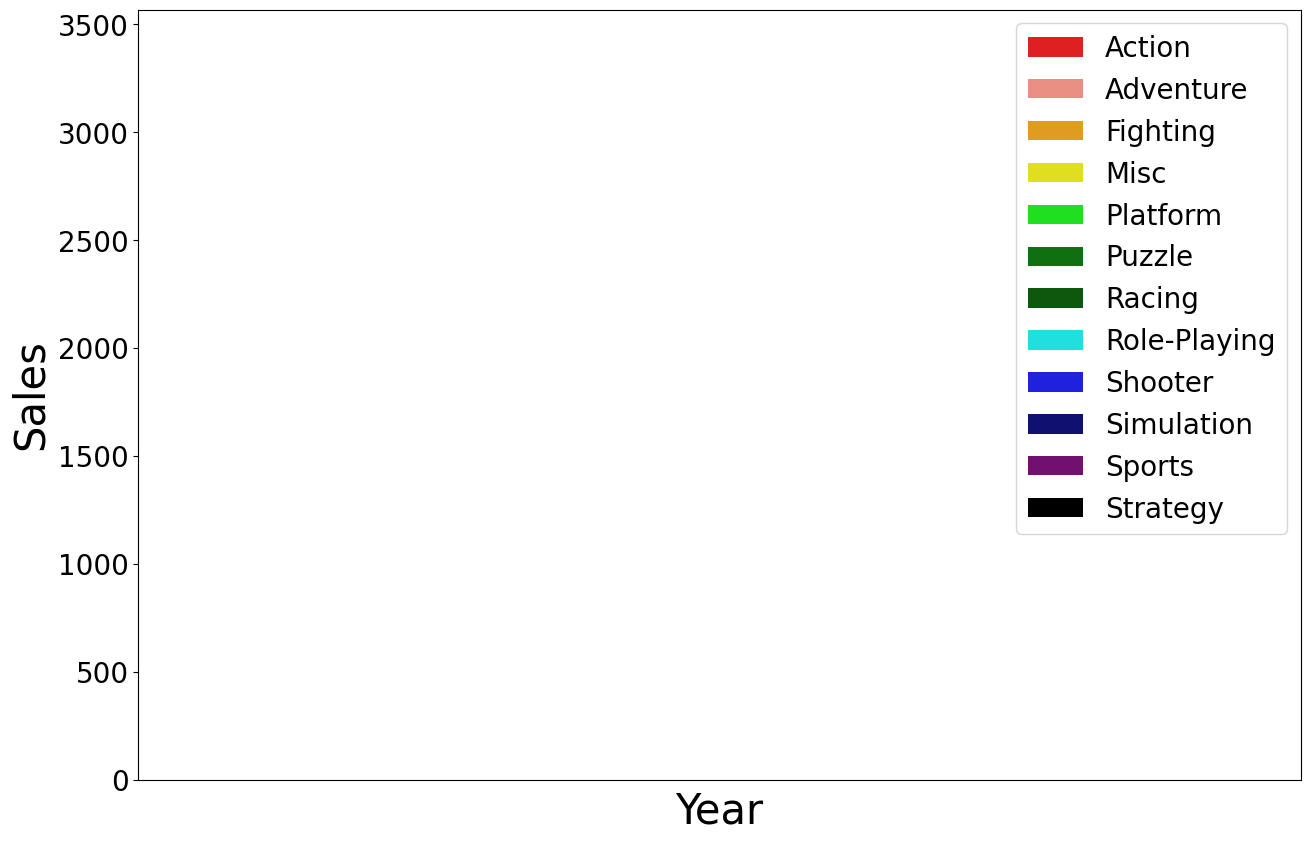

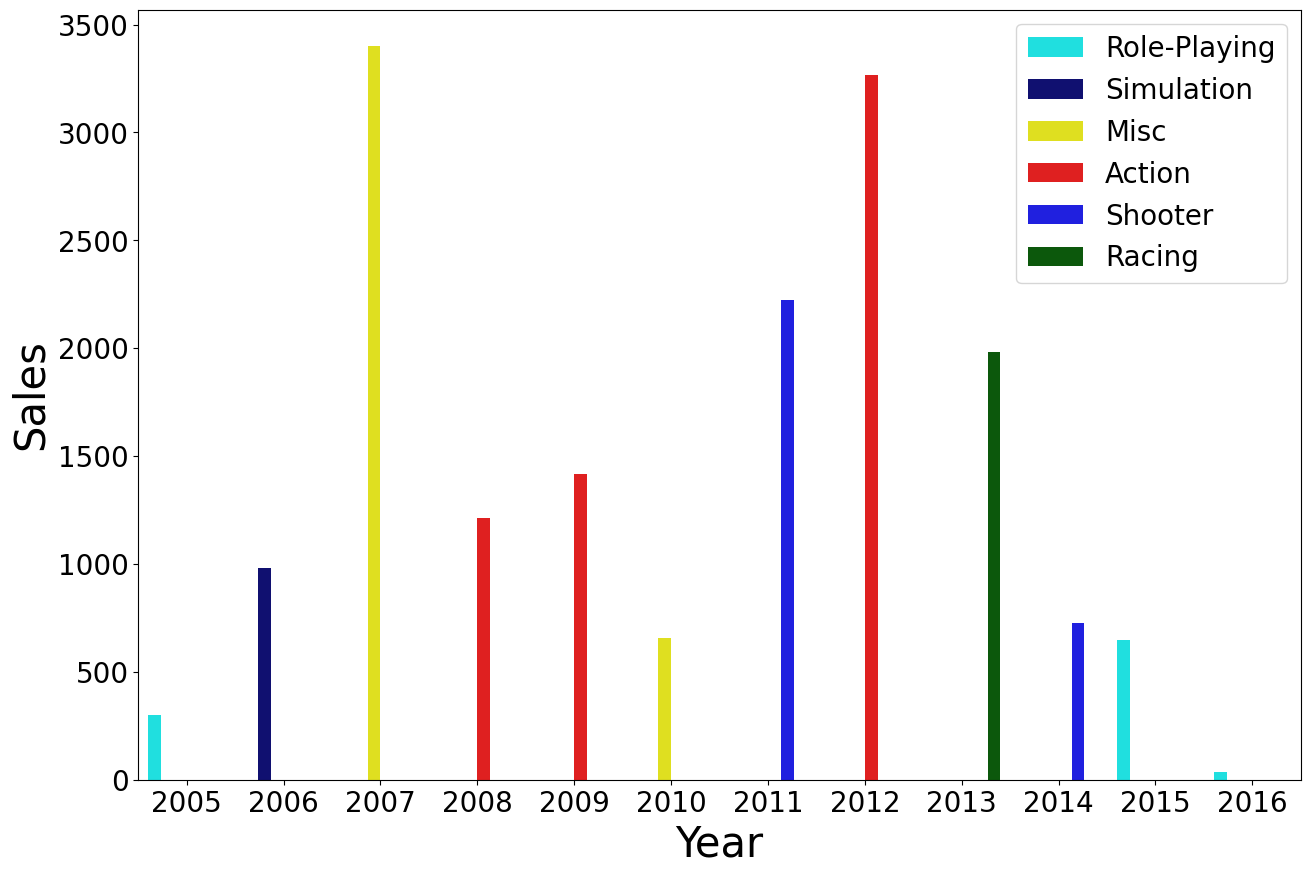

In [152]:
Year_Genre_df = df[['Year','Genre','All_region']]
Year_Genre_df = Year_Genre_df.dropna()
Year_Genre_df['Year'] = Year_Genre_df['Year'].astype('int64')

Year_Genre_df = Year_Genre_df.groupby([Year_Genre_df['Year'], Year_Genre_df['Genre']])['All_region'].sum()
Year_Genre_df = pd.DataFrame(Year_Genre_df)
Year_Genre_df.reset_index(inplace=True)
print(Year_Genre_df)

Year_list = Year_Genre_df['Year'].values.tolist()
Year_set = set(Year_list)
Year_list = list(Year_set)
Year_num = len(Year_list)

Y_num_list = [1980, 1981 ,1982 ,1983 ,1984 ,1985 ,1986 ,1987 ,1988 ,1989 ,1990 ,1991 ,1992 ,1993 ,1994 ,1995 ,1996 ,1997 ,1998 ,1999 ,2000 ,2001 ,2002 ,2003,2004 ,2005 ,2006 ,2007 ,2008 ,2009 ,2010 ,2011 ,2012 ,2013 ,2014 ,2015 ,2016 ,2017 ,2020]

top_3_df = pd.DataFrame({'Year':[],'Genre':[],'All_region':[]})

for i in range(39):
    max = Year_Genre_df[Year_Genre_df['Year'] == Y_num_list[i]].sort_values('All_region', ascending=False).reset_index().drop('index', axis=1)
    max = max[max.index < 3]
    top_3_df = pd.concat([top_3_df,max])
top_3_df.reset_index(inplace=True)
top_3_df['Year'] = top_3_df['Year'].astype('int64')

print(top_3_df)

top_df = pd.DataFrame({'Year':[],'Genre':[],'All_region':[]})

for i in range(39):
    max = Year_Genre_df[Year_Genre_df['Year'] == Y_num_list[i]].sort_values('All_region', ascending=False).reset_index().drop('index', axis=1)
    max = max[max.index < 1]
    top_df = pd.concat([top_df,max])
top_df.reset_index(inplace=True)
top_df['Year'] = top_df['Year'].astype('int64')

print(top_df)

#연도에 따른 장르별 출고량 그래프
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('axes', prop_cycle=(cycler(color=['red', 'salmon', 'orange', 'yellow', 'lime', 'green', 'darkgreen', 'aqua', 'blue', 'navy', 'purple', 'black'])))

plt.figure(figsize=(15,10))
p = sns.barplot(
    data=Year_Genre_df,
    x="Year", y='All_region',
    hue='Genre'
    ) #dodge=False: 막대그래프 겹치게 설정
p.set_xlabel("Year", fontsize = 30)
p.set_ylabel("Sales", fontsize = 30)
plt.legend(loc = 'upper right', fontsize=20)
plt.xlim(2005,2016)
plt.show()

plt.rc('axes', prop_cycle=(cycler(color=['aqua', 'navy', 'yellow', 'red', 'blue', 'darkgreen'])))
plt.figure(figsize=(15,10))
p = sns.barplot(
    data=top_df,
    x="Year", y='All_region',
    hue='Genre'
    ) #dodge=False: 막대그래프 겹치게 설정
p.set_xlabel("Year", fontsize = 30)
p.set_ylabel("Sales", fontsize = 30)
plt.legend(loc = 'upper right', fontsize=20)
plt.show()

##### 게임 장르 트렌드 분석

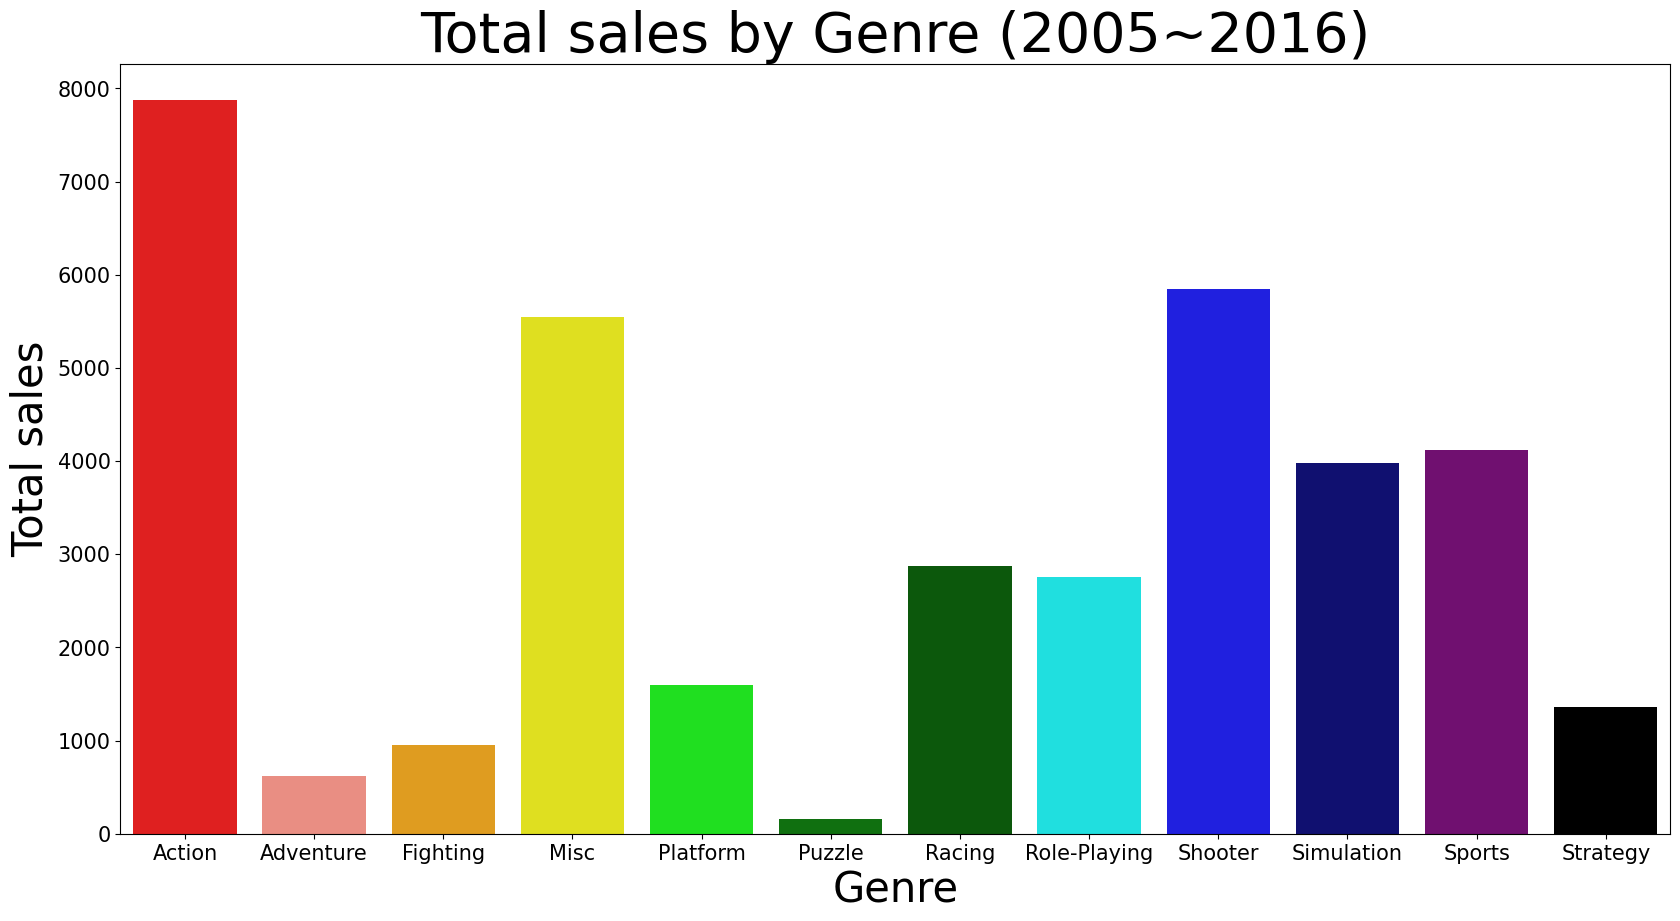

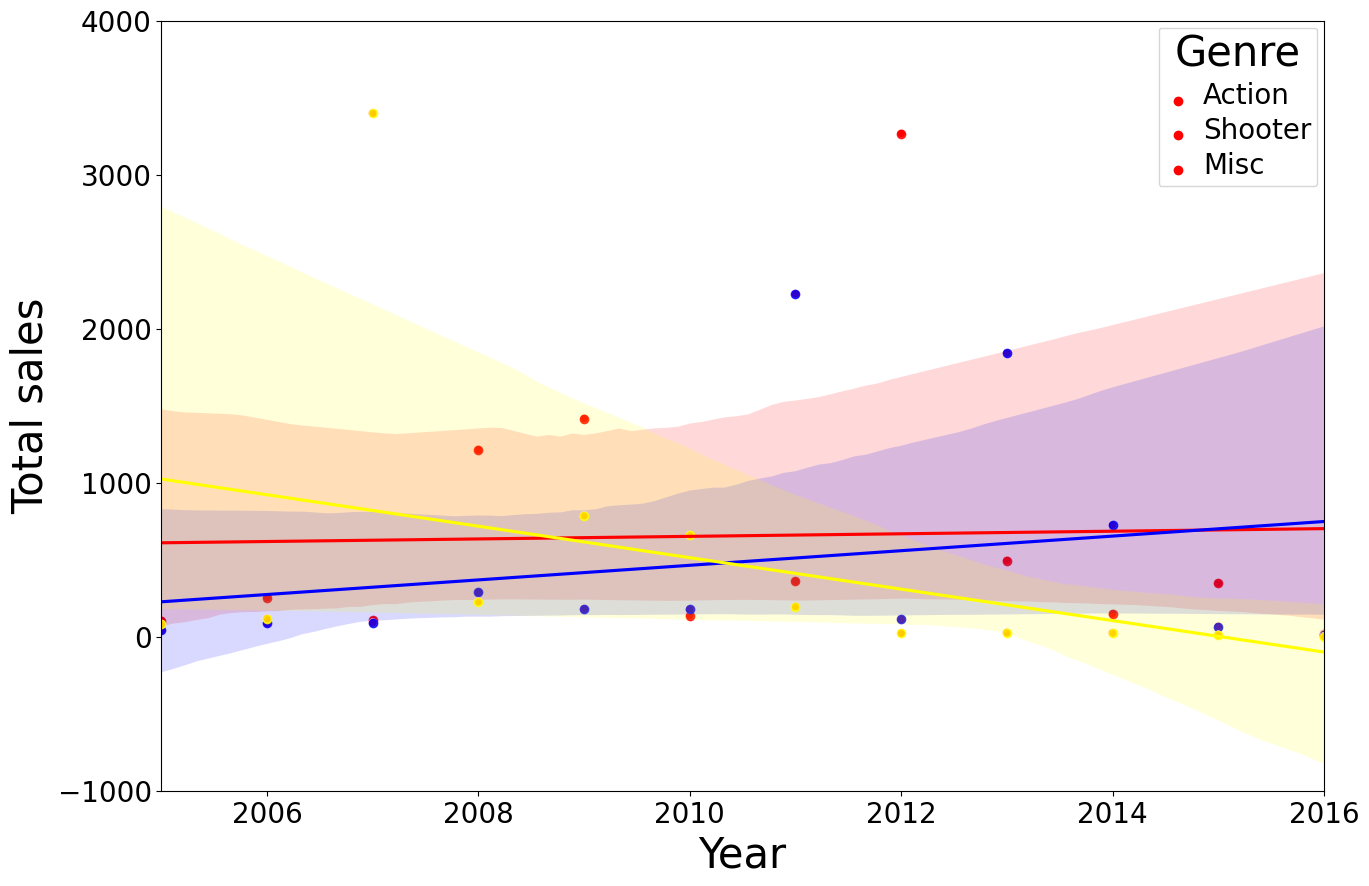

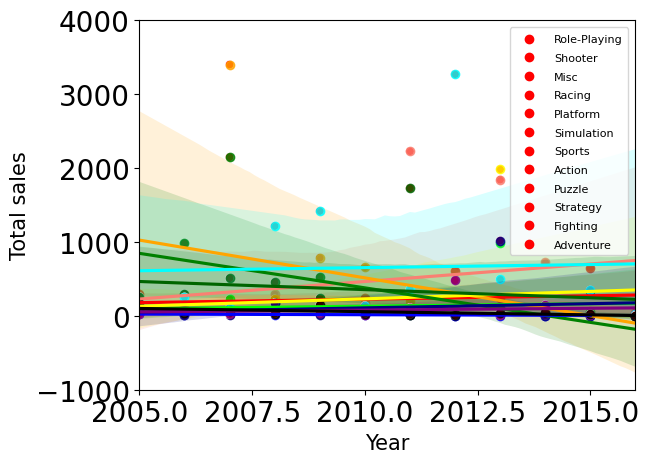

In [153]:
#게임장르별 매출 순위
Year_Genre_2005_df = Year_Genre_df[Year_Genre_df.Year > 2004]
Year_Genre_2005_df = Year_Genre_2005_df[Year_Genre_2005_df.Year < 2017]
Genre_Sales = Year_Genre_2005_df.groupby(Year_Genre_2005_df['Genre'])['All_region'].sum()
Genre_Sales_df = pd.DataFrame(Genre_Sales)
Genre_Sales_df.reset_index(inplace=True)
Genre_Sales_df.sort_values('All_region')

plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('axes', prop_cycle=(cycler(color=['red', 'salmon', 'orange', 'yellow', 'lime', 'green', 'darkgreen', 'aqua', 'blue', 'navy', 'purple', 'black'])))

plt.figure(figsize=(20,10))
p = sns.barplot(
    data=Genre_Sales_df,
    x='Genre', y='All_region')
p.set_title("Total sales by Genre (2005~2016)", fontsize = 40)    
p.set_ylabel("Total sales", fontsize = 30)
p.set_xlabel("Genre", fontsize = 30)
plt.show()

Genre_top3 = ['Action', 'Shooter', 'Misc']
# colors = ['red', 'salmon', 'orange', 'yellow', 'lime', 'green', 'darkgreen', 'aqua', 'blue', 'navy', 'puerple', 'black']
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('axes', prop_cycle=(cycler(color=['red','blue', 'yellow'])))
plt.figure(figsize=(15,10))
for i in range(3):
    p = sns.scatterplot(
        data=Year_Genre_2005_df[Year_Genre_2005_df['Genre'] == Genre_top3[i]],
        x='Year', y='All_region',
        hue='Genre')
    sns.regplot(
        data=Year_Genre_2005_df[Year_Genre_2005_df['Genre'] == Genre_top3[i]],
        x='Year', y='All_region')
    p.set_ylabel("Total sales", fontsize = 30)
    p.set_xlabel("Year", fontsize = 30)
    plt.setp(p.get_legend().get_texts(), fontsize='20')
    plt.setp(p.get_legend().get_title(), fontsize='30')
plt.xlim(2005,2016)
plt.ylim(-1000,4000)
plt.show()
# Z = np.polyfit(Year_Genre_2005_df['Year'], Year_Genre_2005_df['Genre'], 1)
# print(Z)

#연도에 따른 게임장르별 매출변화 그래프
plt.rc('axes', prop_cycle=(cycler(color=['red', 'salmon', 'orange', 'yellow', 'lime', 'green', 'darkgreen', 'aqua', 'blue', 'navy', 'purple', 'black'])))
for i in range(12):
    p = sns.scatterplot(
        data=Year_Genre_2005_df[Year_Genre_2005_df['Genre'] == Genre_list[i]],
        x='Year', y='All_region',
        hue='Genre')
    sns.regplot(
        data=Year_Genre_2005_df[Year_Genre_2005_df['Genre'] == Genre_list[i]],
        x='Year', y='All_region')
    p.set_ylabel("Total sales", fontsize = 15)
    p.set_xlabel("Year", fontsize = 15)
    plt.legend(loc='upper right')
    plt.setp(p.get_legend().get_texts(), fontsize='8')
    plt.setp(p.get_legend().get_title(), fontsize='10')
plt.xlim(2005,2016)
plt.ylim(-1000,4000)
plt.show()


##### 플랫폼 별 매출 분석

   Platform  Year  All_region
43      PS3  2006       21.06
44      PS3  2007      633.01
45      PS3  2008      928.90
46      PS3  2009      959.98
47      PS3  2010      354.17
48      PS3  2011     1897.00
49      PS3  2012     2665.76
50      PS3  2013      856.68
51      PS3  2014      819.82
52      PS3  2015       78.10
53      PS3  2016        2.49
   Platform         Genre  All_region
73      PS3        Action     4227.54
74      PS3     Adventure       22.85
75      PS3      Fighting      141.24
76      PS3          Misc      764.78
77      PS3      Platform      109.66
78      PS3        Puzzle        0.45
79      PS3        Racing      572.49
80      PS3  Role-Playing      224.64
81      PS3       Shooter      854.99
82      PS3    Simulation      500.20
83      PS3        Sports     1793.36
84      PS3      Strategy        4.77


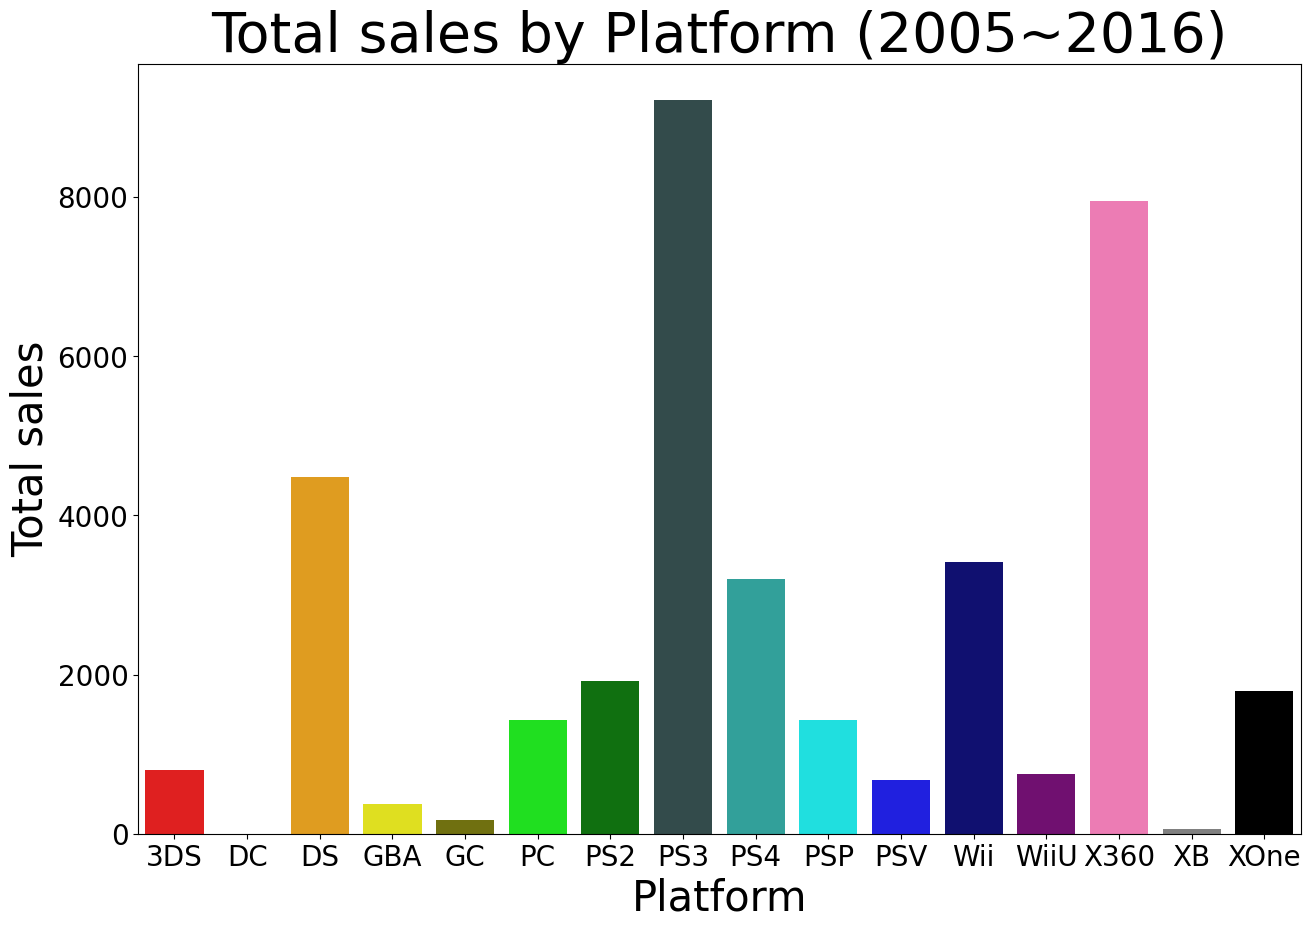

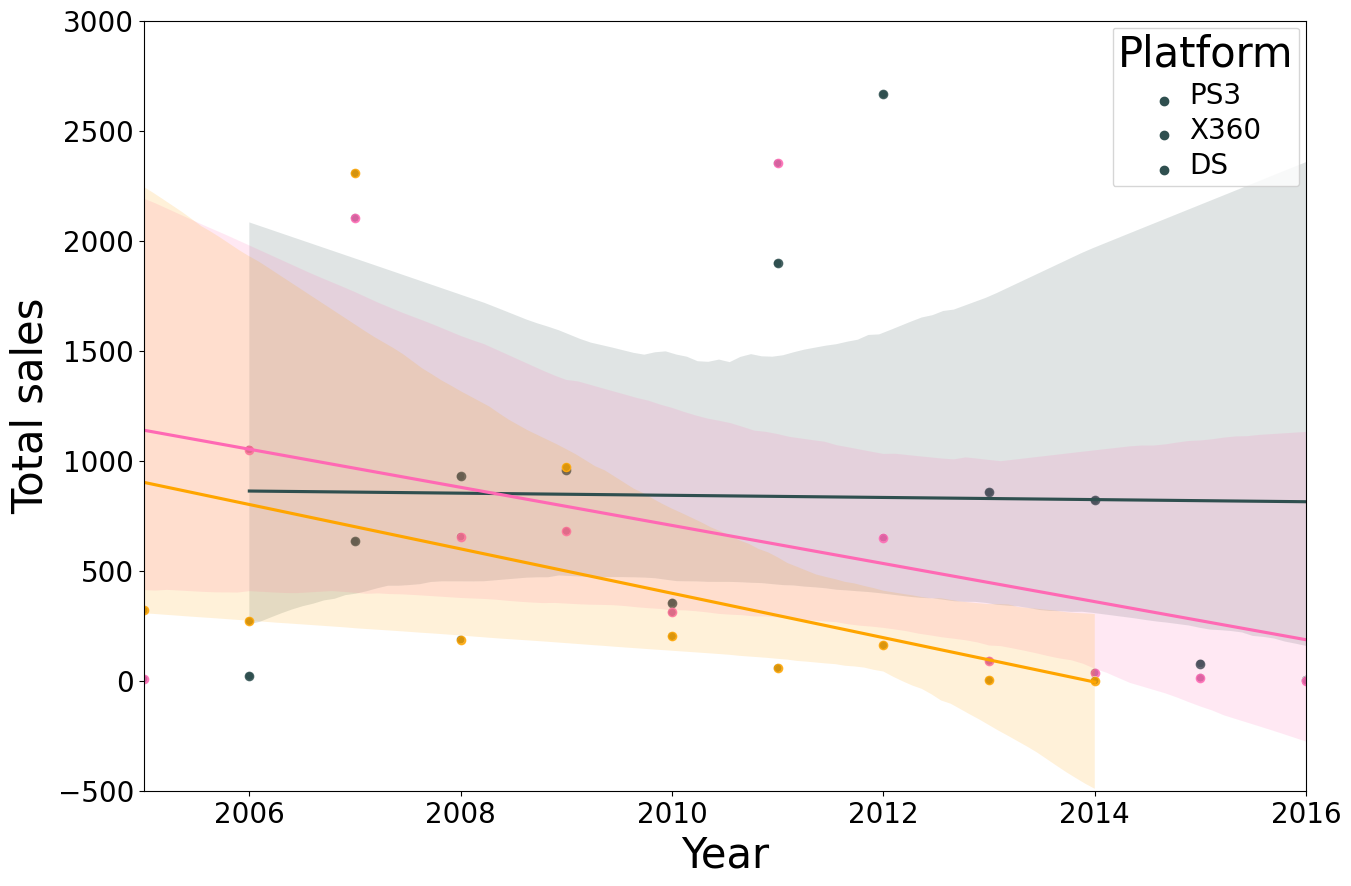

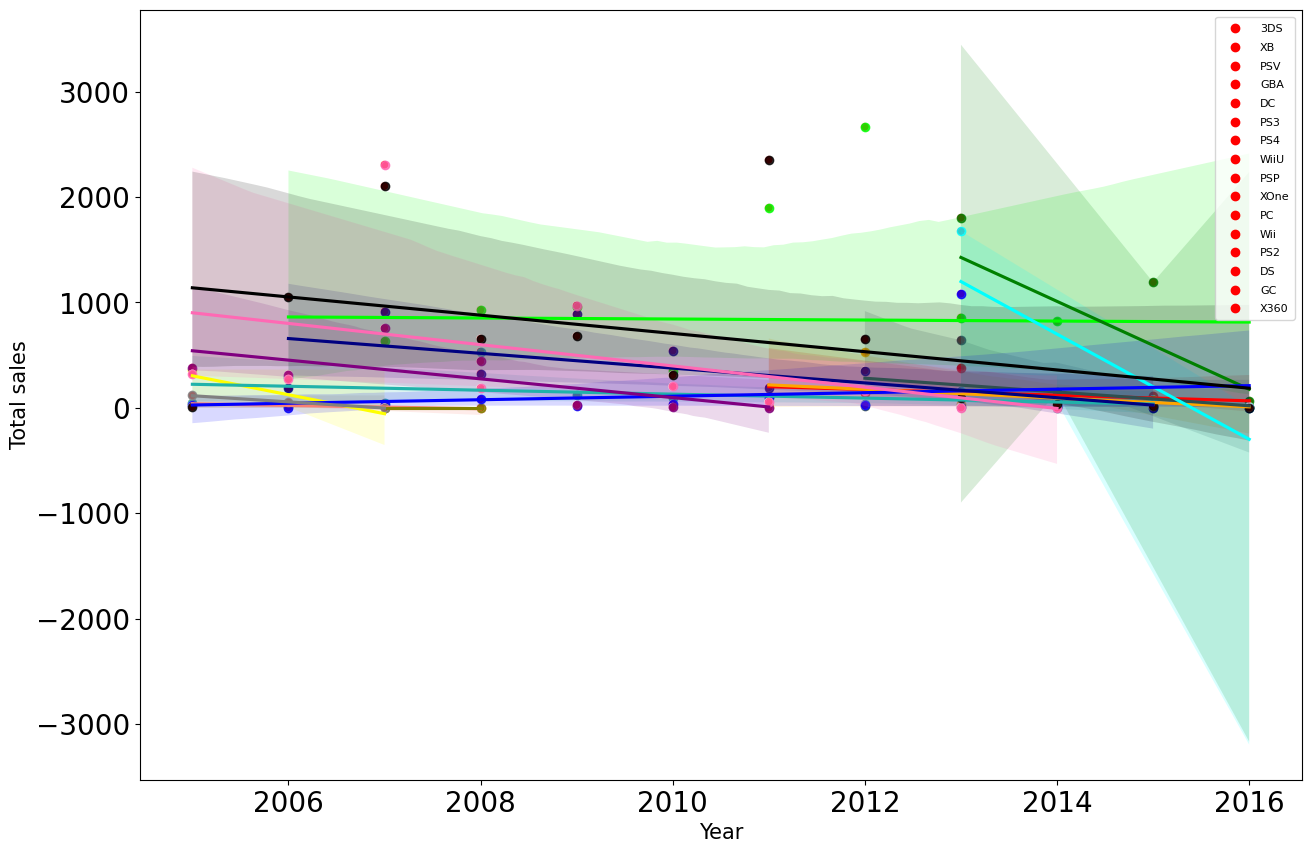

In [161]:
pf_df = df[['Platform','Year','Genre','All_region']]
pf_df = pf_df.dropna().reset_index()
pf_df['Year'] = pf_df['Year'].astype('int64')
pf_df.drop('index',axis=1,inplace=True)

pf_sales = pf_df.groupby([pf_df['Platform'],pf_df['Year']])['All_region'].sum()
pf_sales_df = pd.DataFrame(pf_sales)
pf_sales_df = pf_sales_df.reset_index()
pf_sales_2005_df = pf_sales_df[pf_sales_df.Year > 2004]
pf_sales_2005_df = pf_sales_2005_df[pf_sales_2005_df.Year < 2017]
print(pf_sales_2005_df[pf_sales_2005_df['Platform']=='PS3'])

pf_total_sales = pf_sales_2005_df.groupby(pf_sales_2005_df['Platform'])['All_region'].sum()
pf_total_sales = pd.DataFrame(pf_total_sales)
pf_total_sales.reset_index(inplace=True)

Platform_list = pf_total_sales['Platform'].values.tolist()
Platform_set = set(Platform_list)
Platform_list = list(Platform_set)
Platform_num = len(Platform_list)

PS3_Genre_list = pf_df['Genre'].values.tolist()
PS3_Genre_set = set(PS3_Genre_list)
PS3_Genre_list = list(PS3_Genre_set)

pf_genre_sales = pf_df.groupby([pf_df['Platform'],pf_df['Genre']])['All_region'].sum()
pf_genre_sales_df = pd.DataFrame(pf_genre_sales)
pf_genre_sales_df.reset_index(inplace=True)
print(pf_genre_sales_df[pf_genre_sales_df['Platform']=='PS3'])

#플랫폼 별 매출 총량
plt.figure(figsize=(15,10))
plt.rc('axes', prop_cycle=(cycler(color=['red', 'salmon', 'orange', 'yellow','olive', 'lime', 'green', 'darkslategray','lightseagreen', 'aqua', 'blue', 'navy', 'purple','hotpink', 'gray','black'])))
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
p = sns.barplot(
    data=pf_total_sales,
    x='Platform', y='All_region')
p.set_title("Total sales by Platform (2005~2016)", fontsize = 40)    
p.set_ylabel("Total sales", fontsize = 30)
p.set_xlabel("Platform", fontsize = 30)
plt.show()

#연도에 따른 플랫폼 별 매출 총량
Platform_top3 = ['PS3', 'X360', 'DS']
# colors = ['red', 'salmon', 'orange', 'yellow', 'lime', 'green', 'darkgreen', 'aqua', 'blue', 'navy', 'purple', 'black']

plt.rc('axes', prop_cycle=(cycler(color=['darkslategray','hotpink', 'orange'])))
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.figure(figsize=(15,10))
for i in range(3):
    p = sns.scatterplot(
        data=pf_sales_2005_df[pf_sales_2005_df['Platform'] == Platform_top3[i]],
        x='Year', y='All_region',
        hue='Platform')
    sns.regplot(
        data=pf_sales_2005_df[pf_sales_2005_df['Platform'] == Platform_top3[i]],
        x='Year', y='All_region')
    p.set_ylabel("Total sales", fontsize = 30)
    p.set_xlabel("Year", fontsize = 30)
    plt.setp(p.get_legend().get_texts(), fontsize='20')
    plt.setp(p.get_legend().get_title(), fontsize='30')
plt.xlim(2005,2016)
plt.ylim(-500,3000)
plt.show()

plt.figure(figsize=(15,10))
plt.rc('axes', prop_cycle=(cycler(color=['red', 'salmon', 'orange', 'yellow','olive', 'lime', 'green', 'darkslategray','lightseagreen', 'aqua', 'blue', 'navy', 'purple','hotpink', 'gray','black'])))
for i in range(Platform_num):
    p = sns.scatterplot(
        data=pf_sales_2005_df[pf_sales_2005_df['Platform'] == Platform_list[i]],
        x='Year', y='All_region',
        hue='Platform')
    sns.regplot(
        data=pf_sales_2005_df[pf_sales_2005_df['Platform'] == Platform_list[i]],
        x='Year', y='All_region')
    p.set_ylabel("Total sales", fontsize = 15)
    p.set_xlabel("Year", fontsize = 15)
    plt.legend(loc='upper right')
    plt.setp(p.get_legend().get_texts(), fontsize='8')
    plt.setp(p.get_legend().get_title(), fontsize='10')
plt.show()

##### 가장 잘팔린 게임은?

In [155]:
name_df = df[['Name','Platform','Year','Genre','All_region']]
name_df = name_df.dropna().reset_index()
name_df['Year'] = name_df['Year'].astype('int64')
name_df = name_df.drop('index', axis=1)
name_df.sort_values('All_region', ascending=False).head(20)

,Name,Platform,Year,Genre,All_region
1087,Assassin's Creed III,PS3,2012,Action,2563.94
5317,Battlefield 3,X360,2011,Shooter,2135.21
7953,Guitar Hero II,X360,2007,Misc,2010.19
6512,Call of Duty: Ghosts,PS4,2013,Shooter,1781.85
3291,Cooking Mama 2: Dinner With Friends,DS,2007,Simulation,1611.99
4618,NBA 2K12,PS3,2011,Sports,1610.50
3512,Forza Motorsport 5,XOne,2013,Racing,1210.96
4679,StarCraft II: Heart of the Swarm,PC,2013,Strategy,1010.65
9522,Viva Pinata,X360,2006,Simulation,960.67
656,Smarty Pants,Wii,2007,Misc,760.69
